In [1]:
import pandas as pd    # Importing the Libraries
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("delivery_time.csv")  # Loading the Dataset 
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()  # It tell us about, does our data contains any null values and about data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()  # .Corr gives the corelation matrix 

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\NirajPalve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

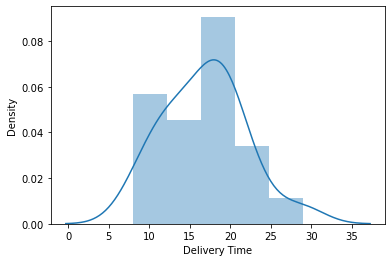

In [5]:
sns.distplot(data['Delivery Time'])

C:\Users\NirajPalve\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

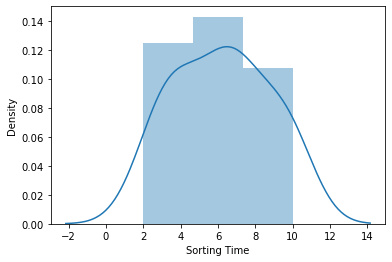

In [6]:
sns.distplot(data['Sorting Time'])

In [7]:
# Renaming Columns
data =data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Model Building

In [8]:
model = smf.ols("Delivery_Time ~ Sorting_Time", data = data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

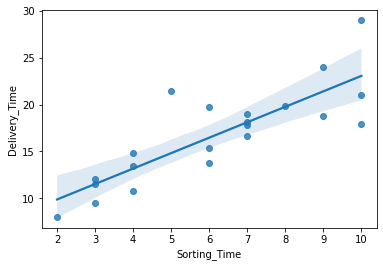

In [9]:
sns.regplot(x = data["Sorting_Time"], y = data["Delivery_Time"])

# Model Testing

In [10]:
model.params # Finding Coefficients of the Parameter 

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [11]:
print(model.tvalues, '\n' , model.pvalues) # For finding t-value & p-value 

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj) # For finding R-squared value 

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [13]:
Delivery_Time = (6.582734) + (1.649020)*(10)  # Manual Prediction of Sorting_Time
Delivery_Time

23.072933999999997

In [14]:
new_data = pd.Series([10,13]) # Auto Predicting for Sorting Time
new_data

0    10
1    13
dtype: int64

In [15]:
data_pred = pd.DataFrame(new_data, columns = ["Sorting_Time"])
data_pred

,Sorting_Time
0,10
1,13


In [16]:
model.predict(data_pred)

0    23.072933
1    28.019993
dtype: float64